### Persistance images from zero homology 

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

In [16]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [17]:
import tadasets
np.random.seed(565656)

In [4]:
# creating the sample data
N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]

datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(N)
labels[N_per_class:] = 1

In [5]:
# contaons 400 XY points( selecting one dataset)
data = datas[0]

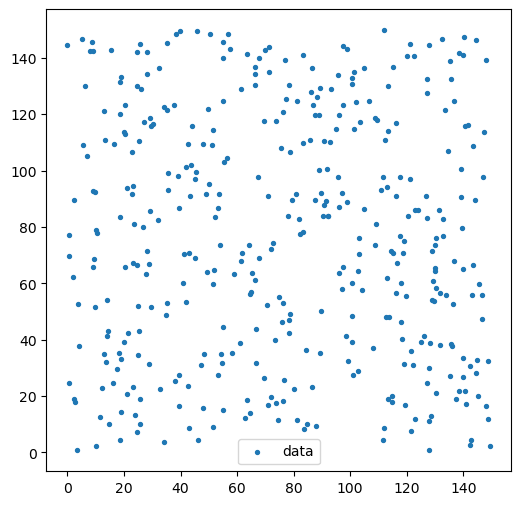

In [6]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data[:,0], data[:,1], label="data", s=8)
plt.axis('equal')
plt.legend()
plt.show()

In [7]:
# creating the persistence diagram from rips class
rips = Rips(maxdim=1, coeff=2)
dgms = rips.fit_transform(data)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [8]:
len(dgms)

2

In [9]:
# seperate the diagrams H0 and H1
diagrams_h0 = dgms[0]
diagrams_h1 = dgms[1]

In [10]:
diagrams_h0

array([[ 0.        ,  0.03791759],
       [ 0.        ,  0.54997313],
       [ 0.        ,  0.61529589],
       [ 0.        ,  0.6914264 ],
       [ 0.        ,  0.78748584],
       [ 0.        ,  0.80681521],
       [ 0.        ,  0.87052417],
       [ 0.        ,  0.87789065],
       [ 0.        ,  0.87887257],
       [ 0.        ,  0.9250347 ],
       [ 0.        ,  0.98749632],
       [ 0.        ,  0.99363375],
       [ 0.        ,  1.06247461],
       [ 0.        ,  1.12079668],
       [ 0.        ,  1.14359188],
       [ 0.        ,  1.15609956],
       [ 0.        ,  1.34681654],
       [ 0.        ,  1.34833086],
       [ 0.        ,  1.42038393],
       [ 0.        ,  1.49990284],
       [ 0.        ,  1.53252792],
       [ 0.        ,  1.63707876],
       [ 0.        ,  1.63880026],
       [ 0.        ,  1.64103031],
       [ 0.        ,  1.72533977],
       [ 0.        ,  1.75043142],
       [ 0.        ,  1.79264593],
       [ 0.        ,  1.81779563],
       [ 0.        ,

In [11]:
ç

array([[19.22117996, 19.62439728],
       [18.61474228, 18.72523499],
       [18.35895348, 18.39889717],
       [16.7757473 , 17.74927902],
       [14.72844219, 15.12716198],
       [14.43365574, 16.31183815],
       [14.30921268, 16.24956703],
       [14.08922672, 15.33835125],
       [13.58394527, 15.10632038],
       [13.15079212, 19.75509834],
       [12.97139454, 13.77219391],
       [12.95059967, 13.60557175],
       [12.93627262, 14.91442108],
       [12.79695511, 13.13426018],
       [12.74695778, 18.86577415],
       [12.59953308, 14.17260456],
       [12.54315376, 13.35115719],
       [12.53089905, 17.83858299],
       [12.38498688, 14.70102787],
       [12.36539936, 13.69020176],
       [12.05382156, 12.96841621],
       [12.03926563, 17.61247253],
       [11.91854858, 14.81231976],
       [11.81981659, 12.67017841],
       [11.18807793, 15.60777664],
       [11.17482185, 13.8232069 ],
       [10.98571682, 11.31371403],
       [10.91310596, 11.75125122],
       [10.79922104,

In [12]:
# remove last data point in H0 diagram - it is infinity
diagrams_h0_without_inf = diagrams_h0[0:-1]

In [28]:
diagrams_h1.shape

(92, 2)

In [29]:
diagrams_h0_without_inf.shape

(399, 2)

In [30]:
# combine the H0 and H1 diagrams
diagrams_combined = np.concatenate((diagrams_h0_without_inf, diagrams_h1), axis=0)

In [31]:
diagrams_combined.shape

(491, 2)

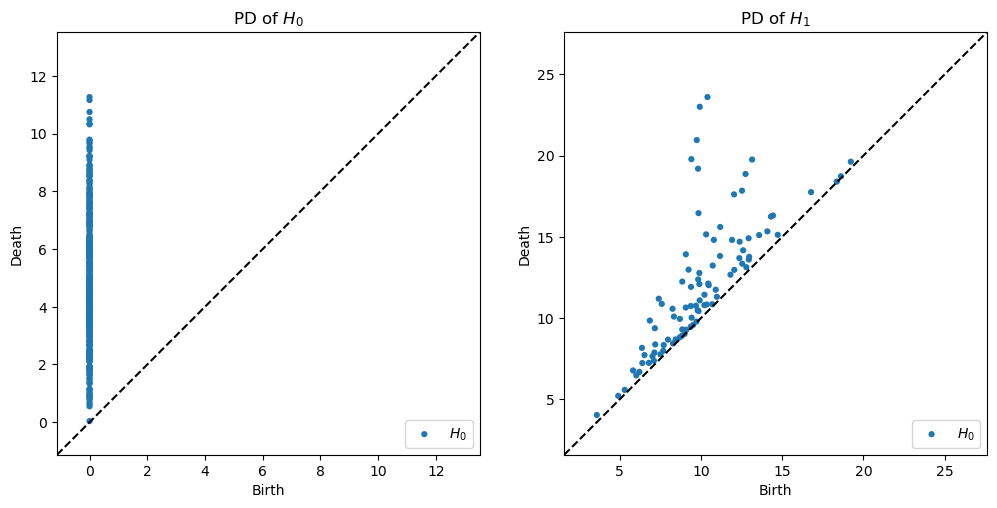

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h0_without_inf, show=False)
plt.title("PD of $H_0$")

plt.subplot(122)
rips.plot(diagrams_h1, show=False)
plt.title("PD of $H_1$")

plt.show()

##### Creating the persistance images

In [32]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=0.1)
# pimgr.fit(diagrams_h0_without_inf)
pimgr.fit(diagrams_combined)

In [33]:
print(pimgr)

PersistenceImager(birth_range=(-0.03941001892090057, 19.2605899810791), pers_range=(0.012409591674804155, 13.212409591674806), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [34]:
#PersistenceImager() attributes can be adjusted at or after instantiation. 
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes:

pimgr.pixel_size = 1
pimgr.birth_range = (-10, 10)
pimgr.pers_range = (0, 17)


pimgr.pixel_size = 1
pimgr.birth_range = (-1, 20)
pimgr.pers_range = (0, 17)

In [35]:
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(-1.0, 20.0), pers_range=(0.0, 17.0), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(21, 17)


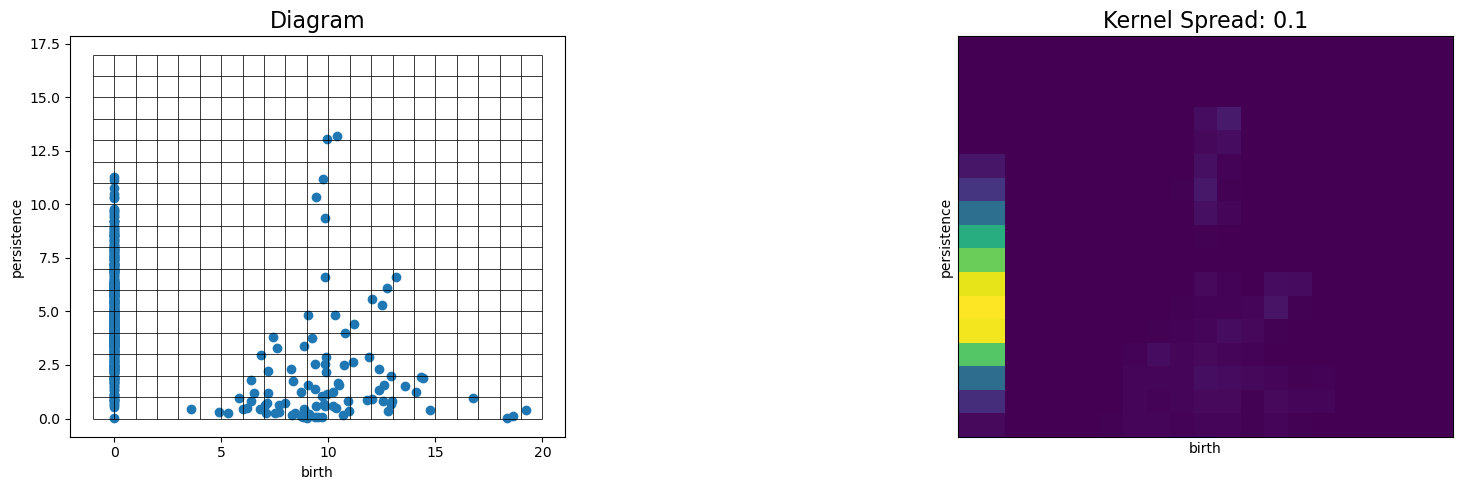

In [37]:
# pixel size 1 and sigma 0.1
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_combined, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
# pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
pimgr.plot_image(pimgr.transform(diagrams_combined), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

### Gudhi Library

In [38]:
import numpy as np
import gudhi as gd
import gudhi.representations
import matplotlib.pyplot as plt

In [39]:
num_pts = 1000
r       = 3.5

In [40]:
X = np.empty([num_pts,2])
x, y = np.random.uniform(), np.random.uniform()
for i in range(num_pts):
    X[i,:] = [x, y]
    x = (X[i,0] + r * X[i,1] * (1-X[i,1])) % 1.
    y = (X[i,1] + r * x * (1-x)) % 1.

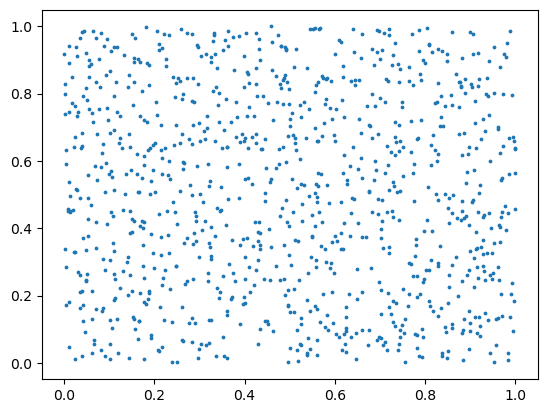

In [44]:
plt.scatter(X[:,0], X[:,1], s=3)
plt.show()

In [45]:
acX = gd.AlphaComplex(points=X).create_simplex_tree()
dgmX = acX.persistence()

/home/h6x/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

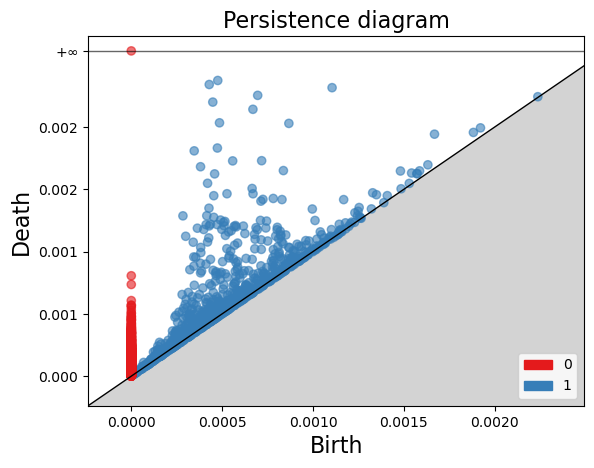

In [46]:
gd.plot_persistence_diagram(dgmX)

In [49]:
type(dgmX)

list

In [50]:
len(dgmX)

1958

A persistence image is obtained by rotating by , centering Gaussian functions on all diagram points (usually weighted by a parameter function---here we consider the squared distance to the diagonal) and summing all these Gaussians. This gives a 2D function, that is pixelized into an image.

In [58]:
PI = gd.representations.PersistenceImage(bandwidth=1e-4, weight=lambda x: x[1]**2, 
                                         im_range=[0,.004,0,.004], resolution=[100,100])

# PI = gd.representations.PersistenceImage(bandwidth=1e-4, weight=lambda x: 1, \
#                                          im_range=[0,.004,0,.004], resolution=[100,100])

In [59]:
pi = PI.fit_transform([acX.persistence_intervals_in_dimension(1)])

Text(0.5, 1.0, 'Persistence Image')

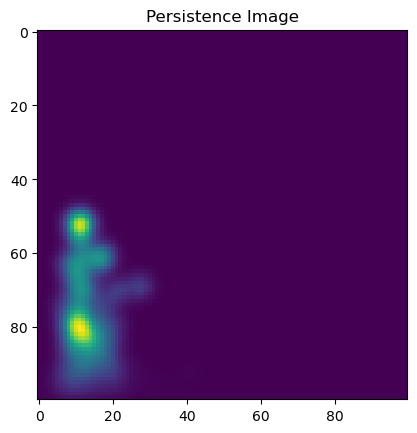

In [60]:
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.title("Persistence Image")

Text(0.5, 1.0, 'Persistence Image')

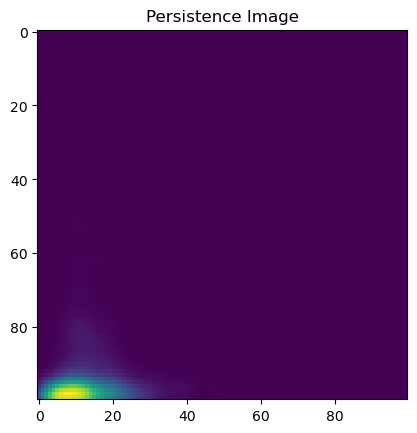

In [61]:
PI = gd.representations.PersistenceImage(bandwidth=1e-4, weight=lambda x: 1, \
                                         im_range=[0,.004,0,.004], resolution=[100,100])
pi = PI.fit_transform([acX.persistence_intervals_in_dimension(1)])

plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.title("Persistence Image")

In [63]:
type(acX.persistence_intervals_in_dimension(1))

numpy.ndarray

In [64]:
acX.persistence_intervals_in_dimension(1).shape

(958, 2)

In [67]:
acX.persistence_intervals_in_dimension(0).shape

(1000, 2)

In [68]:
pers_intervals_of_dim_1_and_0 = np.concatenate((acX.persistence_intervals_in_dimension(1), acX.persistence_intervals_in_dimension(0)), axis=0)

In [73]:
# drop the infinity points
pers_intervals_of_dim_1_and_0 = pers_intervals_of_dim_1_and_0[0:-2]

In [74]:
pers_intervals_of_dim_1_and_0.shape

(1956, 2)

In [75]:
type(pers_intervals_of_dim_1_and_0)


numpy.ndarray

Text(0.5, 1.0, 'Persistence Image')

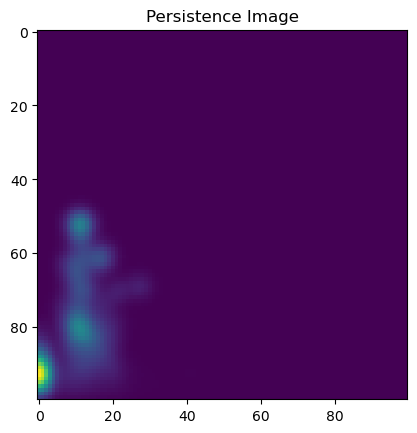

In [76]:
PI = gd.representations.PersistenceImage(bandwidth=1e-4, weight=lambda x: x[1]**2, \
                                         im_range=[0,.004,0,.004], resolution=[100,100])
pi = PI.fit_transform([pers_intervals_of_dim_1_and_0])

plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.title("Persistence Image")

Text(0.5, 1.0, 'Persistence Image')

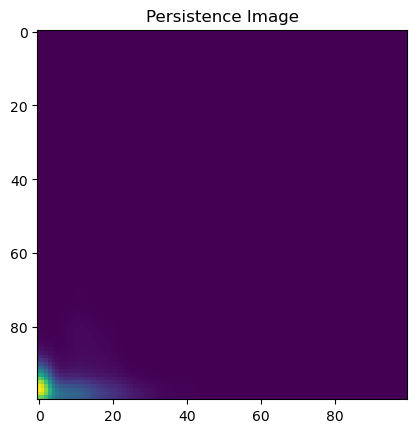

In [77]:
PI = gd.representations.PersistenceImage(bandwidth=1e-4, weight=lambda x: 1, \
                                         im_range=[0,.004,0,.004], resolution=[100,100])
pi = PI.fit_transform([pers_intervals_of_dim_1_and_0])

plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.title("Persistence Image")

### Persistence Imager Library

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


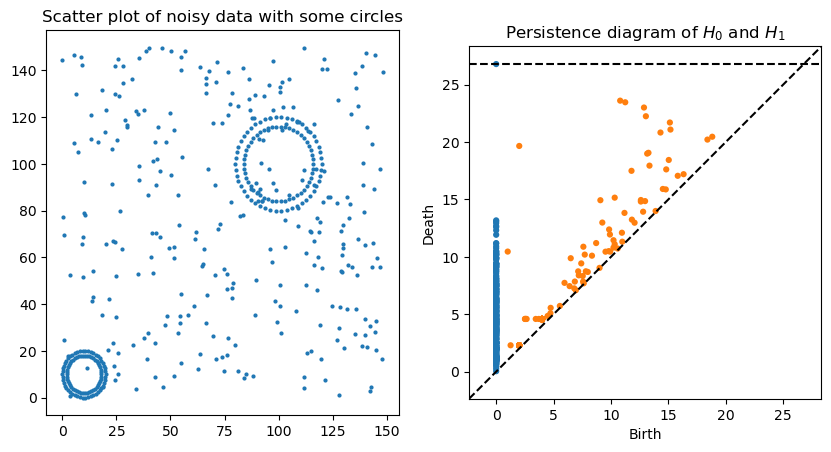

In [18]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [19]:
# We first import one of the implemented weighting functions, a peicewise linear ramp
from persim.images_weights import linear_ramp

pimgr.pixel_size = 1
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':2.0, 'end':10.0}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Linear Ramp Weighting, Remove Small Persistence Pairs', fontsize=16)

plt.tight_layout()
plt.show()

NameError: name 'pimgr' is not defined

In [24]:
def custom_weight_function(birth, persistence,low, high, start,end):
    # Example: assign weights based on persistence (death - birth)
    return persistence ** 2

In [25]:
pimgr.pixel_size = 1
pimgr.weight = custom_weight_function
# pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

plt.tight_layout()
plt.show()

TypeError: custom_weight_function() got an unexpected keyword argument 'n'

In [26]:
def custom_weight_function_2(birth, persistence,**kwargs):
    return persistence ** 2

In [27]:
def custom_weight_function_3(birth, persistence,**kwargs):
    for key, value in kwargs.items():
        print(f"{key}: {value}")
    return persistence ** 4

In [28]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H1_dgm)

n: 1.0


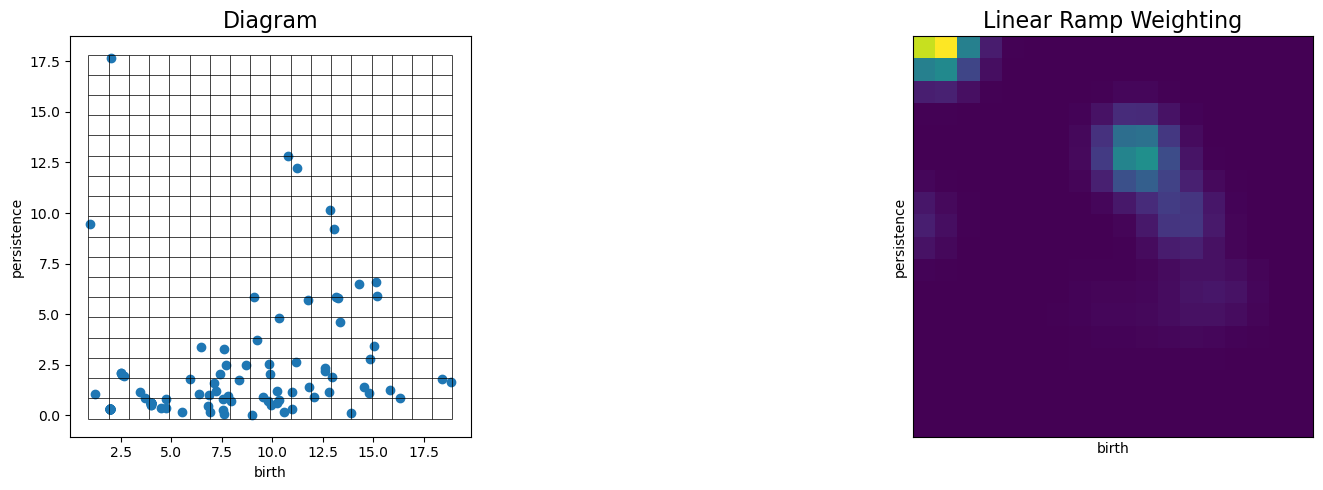

In [32]:
pimgr.pixel_size = 1
pimgr.weight = custom_weight_function_3
# pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm, skew=True), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

plt.tight_layout()
plt.show()

##### Persistance image using 3 data points

In [41]:
# creating a new persistance H0 data
A = np.array([[0.5,0.75],[0.5,1],[0.5,1.25]])

In [42]:
# # # remove infinite bars
# diagrams_h0_without_inf = diagrams_h0[0:-1]

In [43]:
# assigning the new diagram to the old diagram
diagrams_h0_without_inf = A

##### Persistance Image where the points are weighted by their life-time.

In [31]:
# persistance data for H0 without inf value
len(diagrams_h0_without_inf)

3

In [32]:
# lifetime is y coordinates diagrams_h0_without_inf
lifetime = diagrams_h0_without_inf[:,1]

In [33]:
len(lifetime)

3

In [34]:
# Define custom weighting function that uses lifetime as weight 
# default weight function is 'persistance'
def weight_by_lifetime(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(lifetime)

In [35]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': lifetime})
pimgr.fit(diagrams_h0_without_inf)

In [36]:
print(pimgr)

PersistenceImager(birth_range=(0.5, 0.5), pers_range=(0.25, 0.75), pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': array([0.75, 1.  , 1.25])}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [37]:
pimgr.pixel_size = 0.012
pimgr.birth_range = (0, 1)
pimgr.pers_range = (0, 1.5)

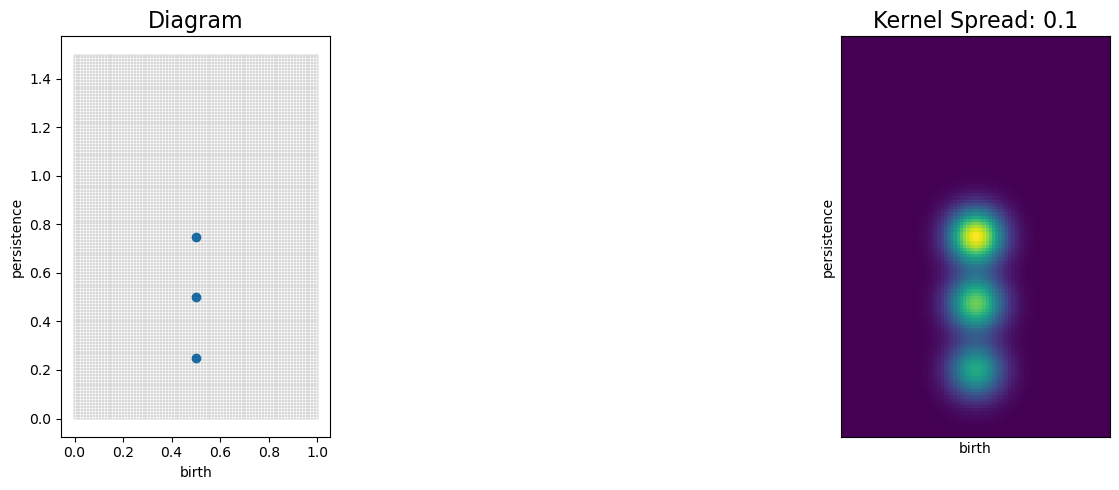

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

### Different weights experiment

In [41]:
#data
# creating a new persistance H0 data
A = np.array([[0.5,0.75],[0.5,1],[0.5,1.25]])

# assigning the new diagram to the old diagram
diagrams_h0_without_inf = A

In [49]:
# Define custom weighting function that uses lifetime as weight 
# default weight function is 'persistance'
def weight_by_lifetime(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(lifetime)

In [50]:
# lifetime is y coordinates diagrams_h0_without_inf
lifetime = diagrams_h0_without_inf[:,1]

In [51]:
lifetime

array([0.75, 1.  , 1.25])

In [52]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(diagrams_h0_without_inf)

In [53]:
pimgr.pixel_size = 0.012
pimgr.birth_range = (0, 1)
pimgr.pers_range = (0, 1.5)

In [ ]:
#2

In [61]:
def weight_by_lifetime2(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(10)

In [62]:
pimgr2 = PersistenceImager(pixel_size=0.1, weight=weight_by_lifetime2, weight_params={'lifetime': lifetime})
pimgr2.fit(diagrams_h0_without_inf)
pimgr2.pixel_size = 0.012
pimgr2.birth_range = (0, 1)
pimgr2.pers_range = (0, 1.5)

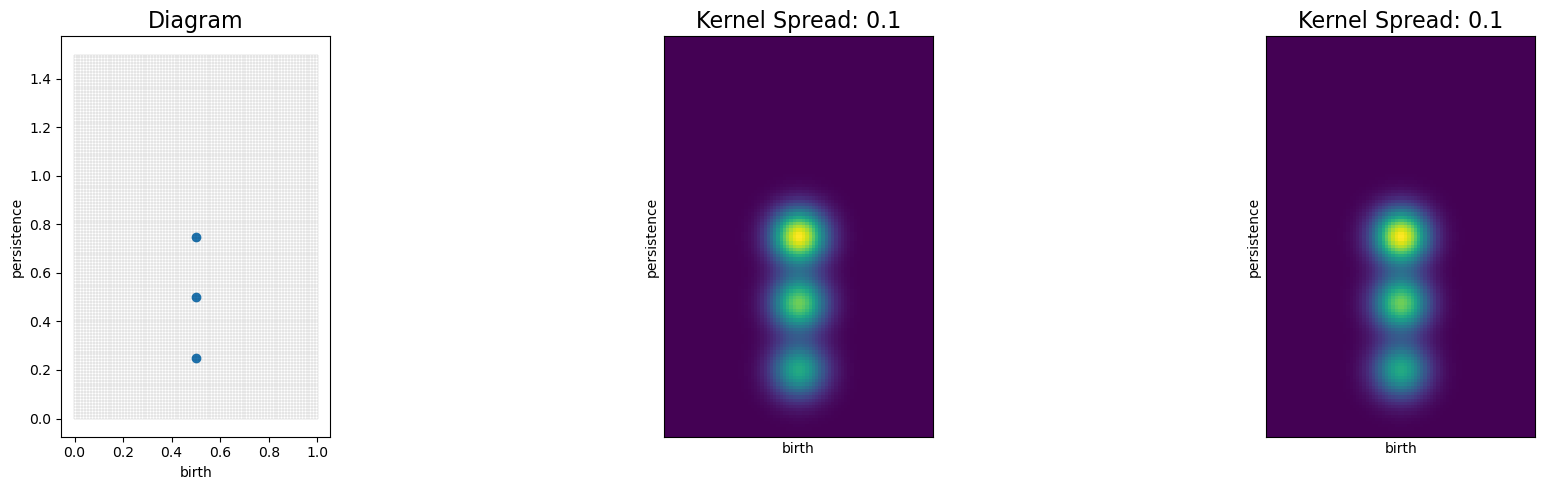

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr2.kernel_params = {'sigma': 0.005}
pimgr2.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

In [38]:
# Different kernel spreads

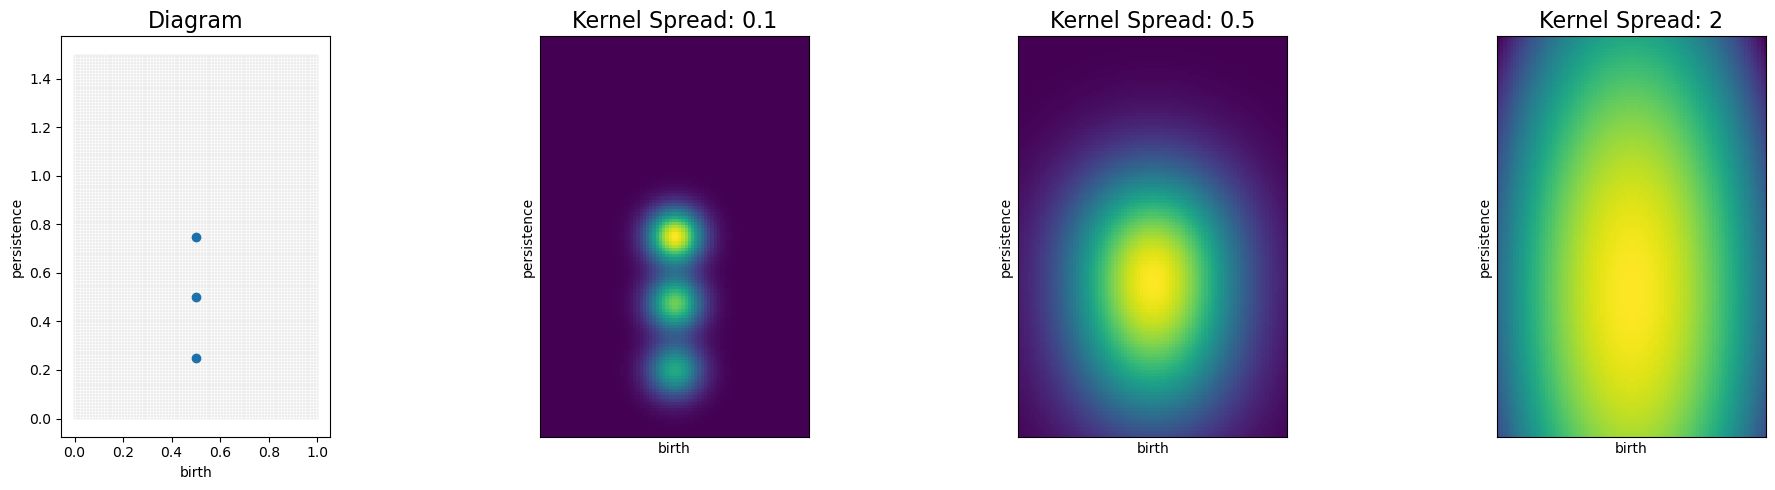

In [35]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr.kernel_params = {'sigma': .05}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.5', fontsize=16)

# Non-isotropic, standard bivariate Gaussian with greater spread along the persistence axis
pimgr.kernel_params = {'sigma': np.array([[1, 0],[0, 6]])}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[3])
axs[3].set_title('Kernel Spread: 2', fontsize=16)

plt.tight_layout()
plt.show()

In [37]:
# Different pixel sizes

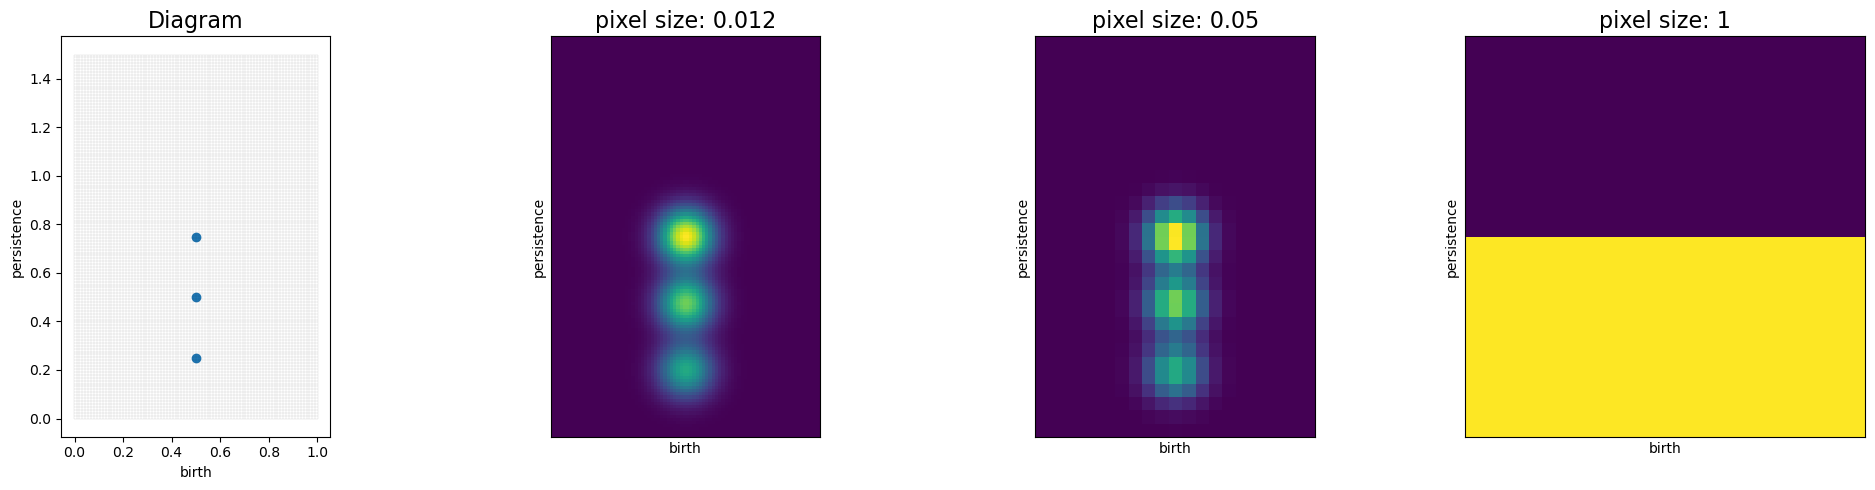

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.005}
pimgr.pixel_size = 0.012
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('pixel size: 0.012', fontsize=16)

pimgr.kernel_params = {'sigma': .005}
pimgr.pixel_size = 0.05
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[2])
axs[2].set_title('pixel size: 0.05', fontsize=16)

pimgr.kernel_params = {'sigma': .005}
pimgr.pixel_size = 1
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[3])
axs[3].set_title('pixel size: 1', fontsize=16)

plt.tight_layout()
plt.show()

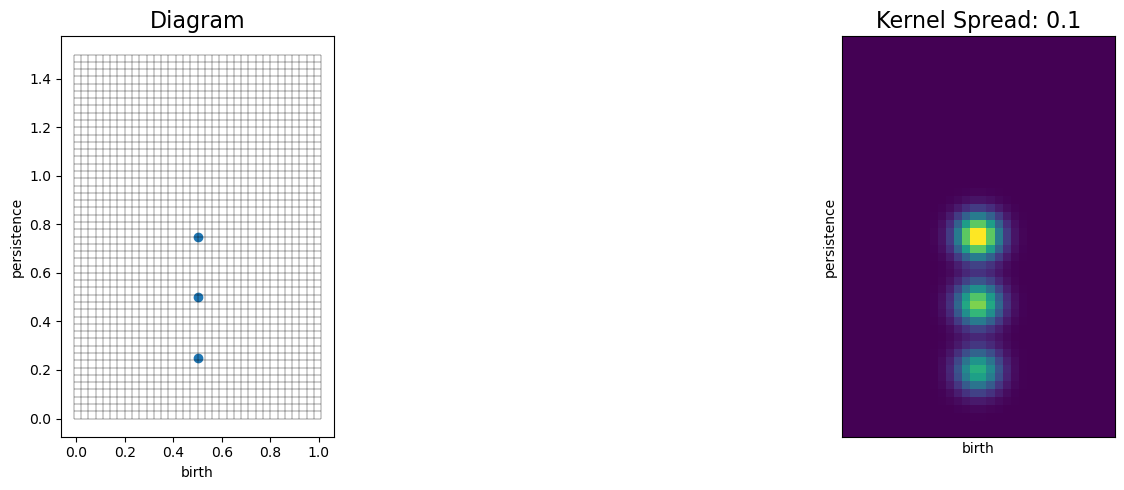

In [36]:
# pixel size 0.03 and sigma 0.003

pimgr.pixel_size = 0.03
pimgr.birth_range = (0, 1)
pimgr.pers_range = (0, 1.5)

fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.003}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()